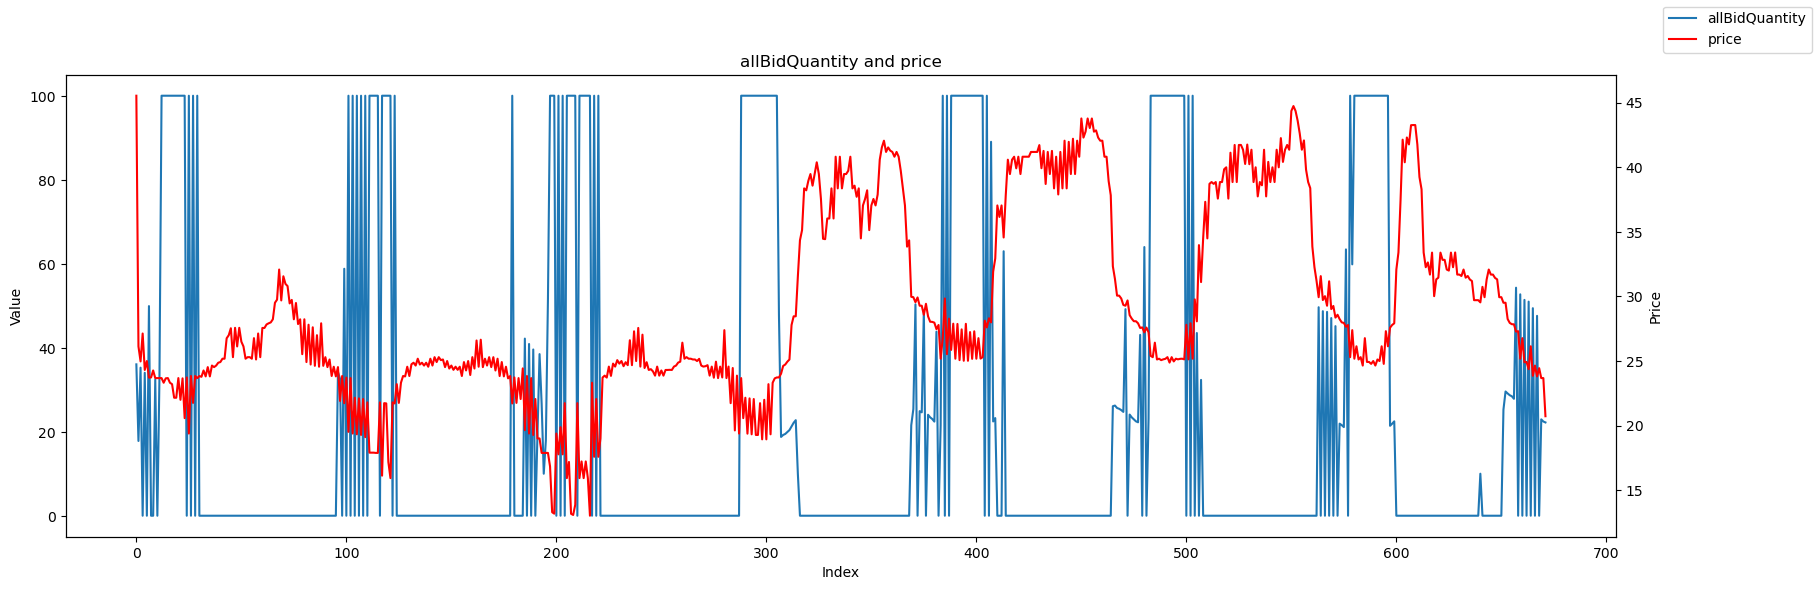

In [9]:
# comparing price and bid amount from seperate optimization

import pandas as pd
import matplotlib.pyplot as plt

# Import the CSV file
df = pd.read_csv("/Users/kanankhasmammadov/Desktop/Thesis - Electrolyzer market participation/flexABLE_w_electrolyzer/Data_processing/optimizedBidAmount.csv")

df_sliced = df[0:672]

fig, ax1 = plt.subplots(figsize=(20, 6))

ax1.plot(df_sliced['optimalBidamount'], label='optimalBidamount')
ax1.set_xlabel('Index')
ax1.set_ylabel('Value')
ax1.set_title('optimalBidamount and price')

ax2 = ax1.twinx()
ax2.plot(df_sliced['price'], color='red', label='price')
ax2.set_ylabel('Price')

fig.legend(loc='upper right')
plt.show()


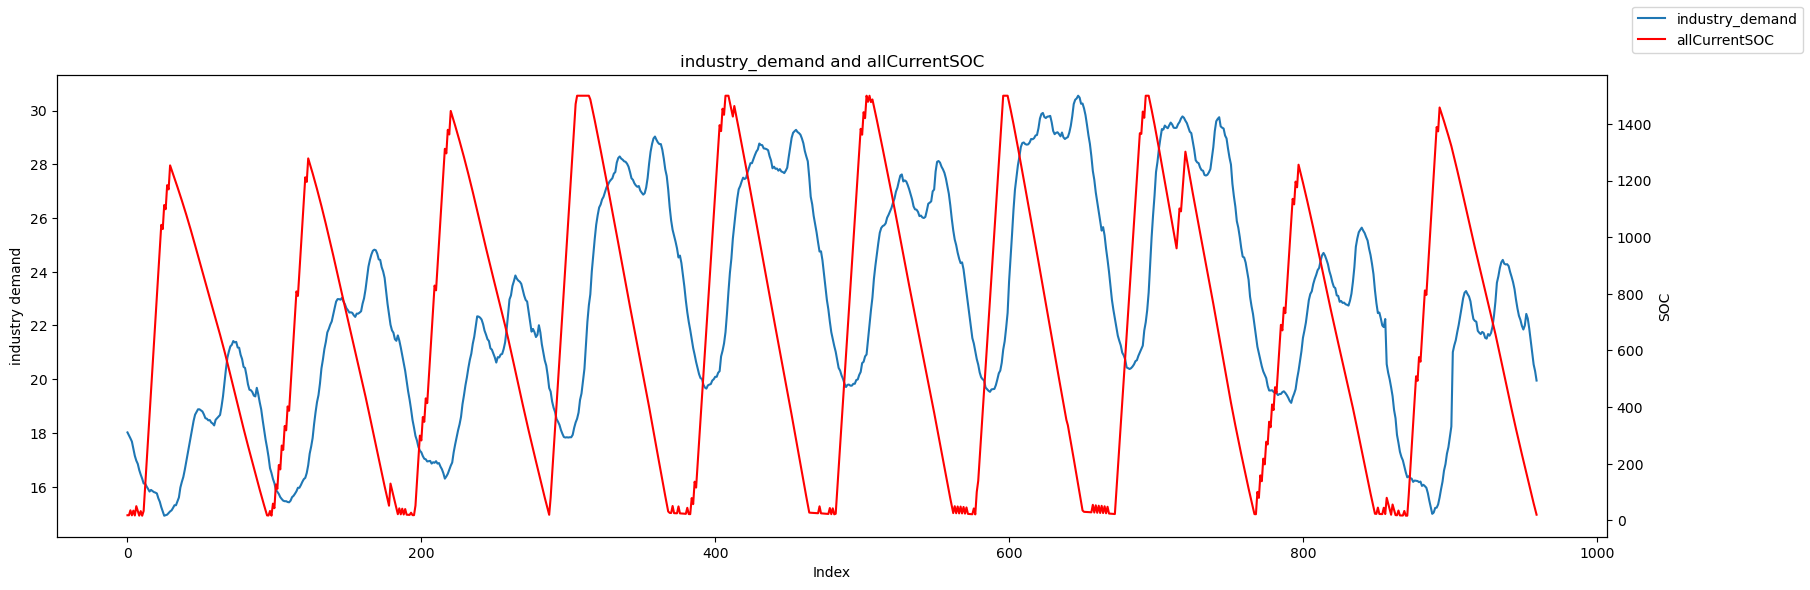

In [10]:
#SOC status vs industry demand - from seperate optimization

fig, ax1 = plt.subplots(figsize=(20, 6))

ax1.plot(df['industry_demand'], label='industry_demand')
ax1.set_xlabel('Index')
ax1.set_ylabel('industry demand')
ax1.set_title('industry_demand and allCurrentSOC')

ax2 = ax1.twinx()
ax2.plot(df['allCurrentSOC'], color='red', label='allCurrentSOC')
ax2.set_ylabel('SOC')

fig.legend(loc='upper right')
plt.show()


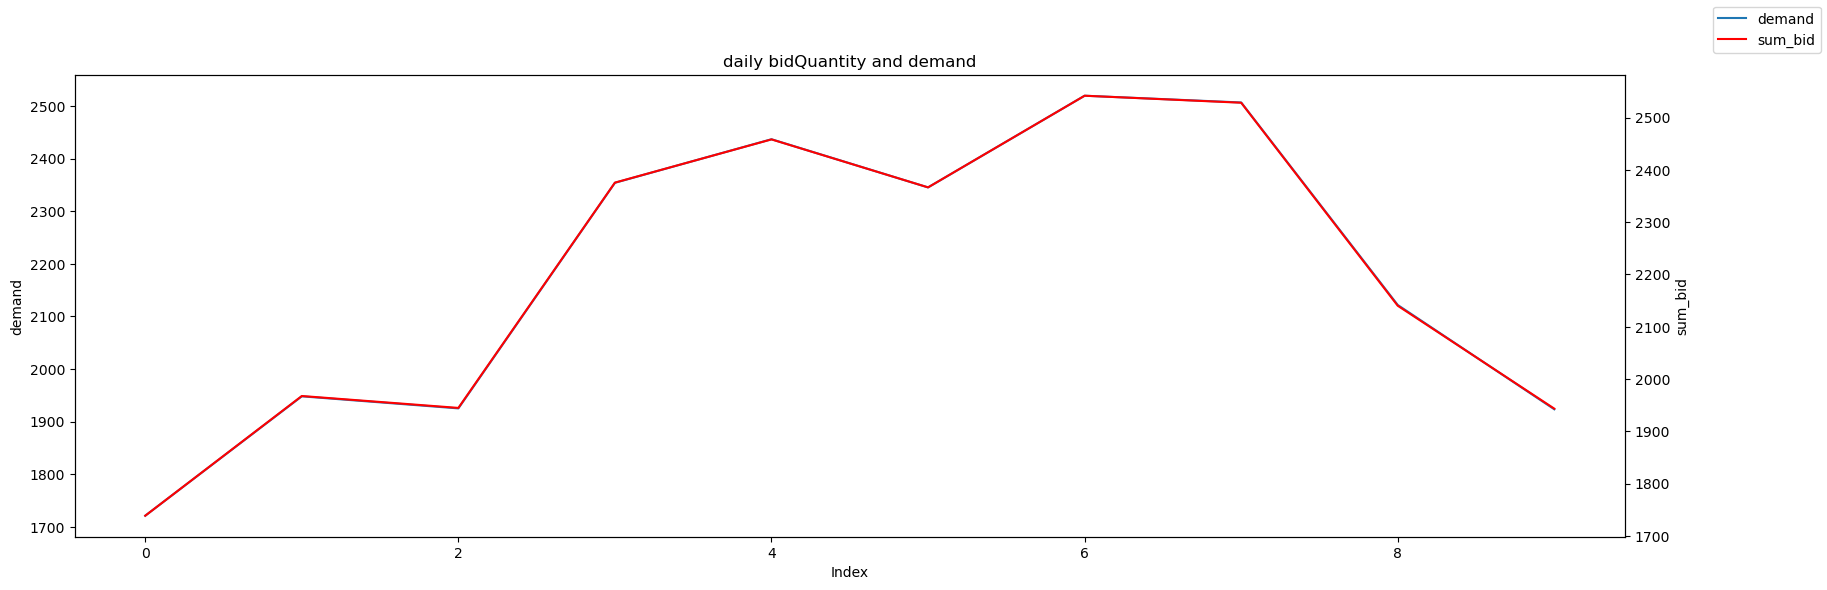

In [11]:
#Resapling daily demand and bid quantity from seperate optimization 
sum_demand = []
sum_bid = []
foresight = 96
industry_demand = list(df["industry_demand"])
bidQuantity = list(df['optimalBidamount'])
interval_count = len(bidQuantity) // foresight
for interval in range(interval_count):
    start_idx = interval * foresight #start point for time interval
    end_idx = (interval + 1) * foresight #start point for time interval
    interval_industrial_demand = industry_demand[start_idx:end_idx]
    interval_bidQuantity = bidQuantity[start_idx:end_idx] #setting intervals for price
    interval_demand = industry_demand[start_idx:end_idx]
    
    sum_demand.append(sum(interval_demand))
    sum_bid.append(sum(interval_bidQuantity))

fig, ax1 = plt.subplots(figsize=(20, 6))

ax1.plot(sum_demand, label='demand')
ax1.set_xlabel('Index')
ax1.set_ylabel('demand')
ax1.set_title('daily bidQuantity and demand')

ax2 = ax1.twinx()
ax2.plot(sum_bid, color='red', label='sum_bid')
ax2.set_ylabel('sum_bid')

fig.legend(loc='upper right')
plt.show()


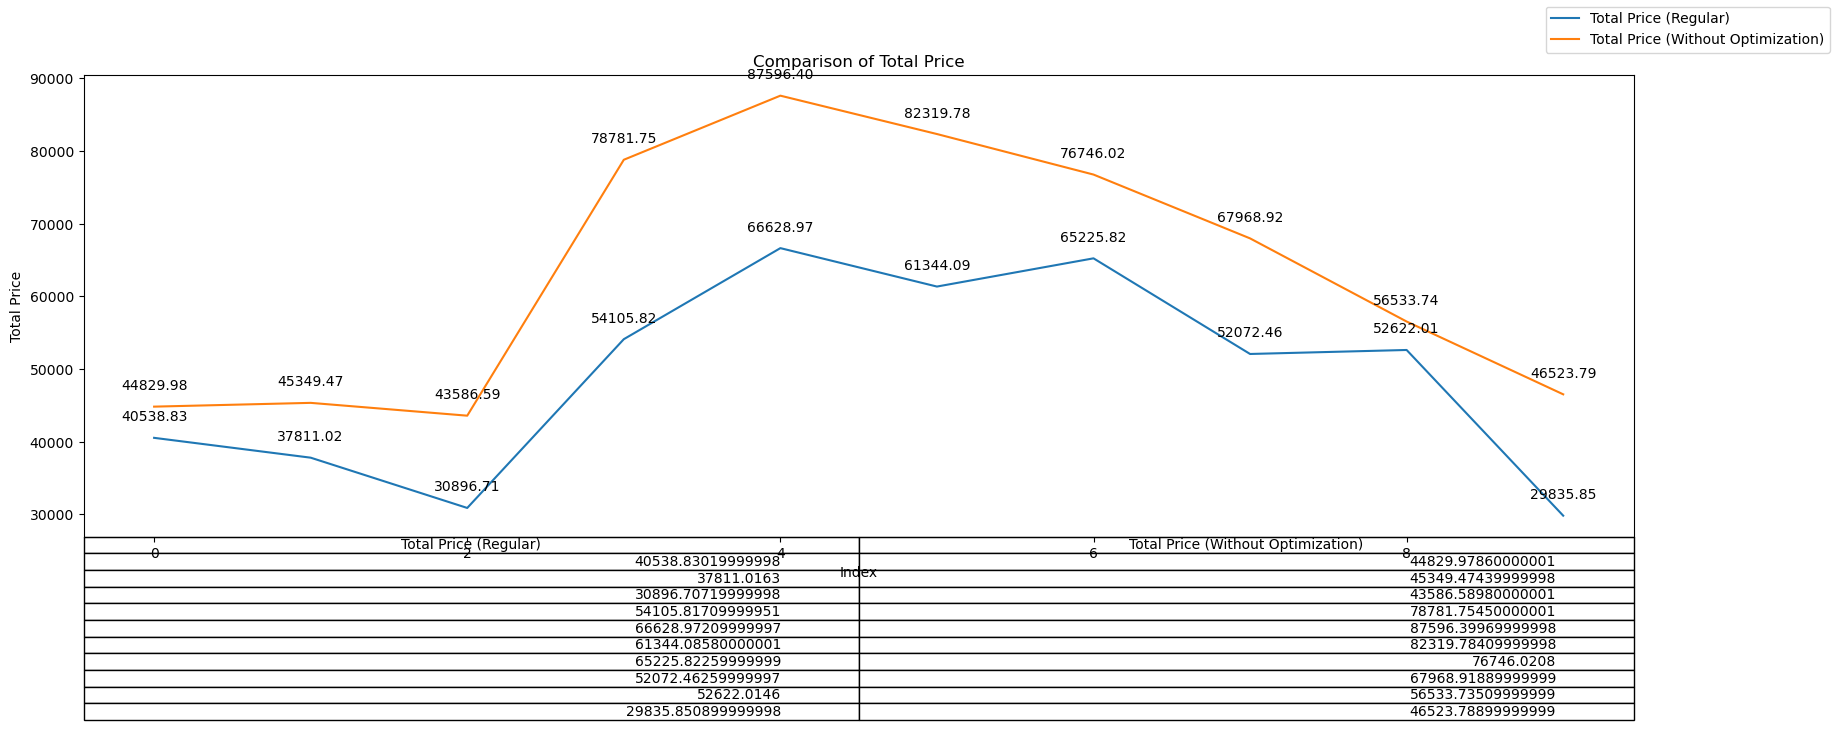

In [12]:
total_price_reg = []
total_price_wo_opt = []
optimalBidAmount_reg = df["optimalBidamount"]
industry_demand = df["industry_demand"]
PFC = df["price"]
interval_count = len(PFC) // foresight
for interval in range(interval_count):
    start_idx = interval * foresight #start point for time interval
    end_idx = (interval + 1) * foresight #start point for time interval
    interval_bidQuantity_reg = pd.to_numeric(optimalBidAmount_reg[start_idx:end_idx]) # convert to numeric
    interval_bidQuantity_wo_opt = pd.to_numeric(industry_demand[start_idx:end_idx]) # convert to numeric
    interval_price = pd.to_numeric(PFC[start_idx:end_idx]) # convert to numeric
    
    
    interval_total_price_reg = sum((qty * p for qty, p in zip(interval_bidQuantity_reg, interval_price)))
    interval_total_price_wo_opt = sum((qty * p for qty, p in zip(interval_bidQuantity_wo_opt, interval_price)))

    total_price_reg.append(interval_total_price_reg)
    total_price_wo_opt.append(interval_total_price_wo_opt)
    
fig, ax = plt.subplots(figsize=(20, 6))

ax.plot(total_price_reg, label='Total Price (Regular)')
ax.plot(total_price_wo_opt, label='Total Price (Without Optimization)')

ax.set_xlabel('Index')
ax.set_ylabel('Total Price')
ax.set_title('Comparison of Total Price')

# Add data labels with vertical spacing
for i, price in enumerate(total_price_reg):
    ax.annotate(f'{price:.2f}', (i, price), textcoords="offset points", xytext=(0,10), ha='center', va='bottom')

for i, price in enumerate(total_price_wo_opt):
    ax.annotate(f'{price:.2f}', (i, price), textcoords="offset points", xytext=(0,10), ha='center', va='bottom')

fig.legend(loc='upper right')

# Create a data table
data = {'Total Price (Regular)': total_price_reg, 'Total Price (Without Optimization)': total_price_wo_opt}
columns = ['Total Price (Regular)', 'Total Price (Without Optimization)']
df = pd.DataFrame(data)

# Display the data table
ax.table(cellText=df.values, colLabels=columns, loc='bottom')

plt.show()


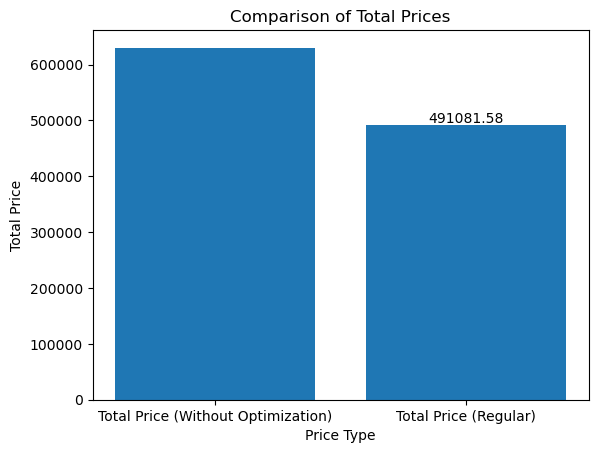

In [13]:
#Price check
total_price_wo_opt = sum(total_price_wo_opt)
total_price_reg = sum(total_price_reg)
difference_reg = total_price_wo_opt - total_price_reg

import matplotlib.pyplot as plt

# Define the data
labels = ['Total Price (Without Optimization)', 'Total Price (Regular)']
values = [total_price_wo_opt, total_price_reg]

# Define the tooltips
tooltips = [f'Total Price (Regular): {total_price_reg:.2f}']

# Create the bar graph
plt.bar(labels, values)

# Add tooltips above total_price_reg and total_price_flex
for i, v in enumerate(values[1:]):
    plt.text(i+1, v, f'{v:.2f}', ha='center', va='bottom')

# Set the title and labels
plt.title('Comparison of Total Prices')
plt.xlabel('Price Type')
plt.ylabel('Total Price')

# Display the plot
plt.show()
